In [1]:
# Import libraries needed for data visualization

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the data into a DataFrame
df = pd.read_csv('qs_rankings.csv')

# Filter to only use data from 2022
df = df[df['year'] == 2022]

In [5]:
# View the first 5 rows of the data
df.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
5182,Massachusetts Institute of Technology (MIT),2022,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
5183,University of Oxford,2022,2,99.5,https://www.topuniversities.com/universities/u...,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,3.0,"8,442",L,"6,708"
5184,Stanford University,2022,3,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
5185,University of Cambridge,2022,3,98.7,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
5186,Harvard University,2022,5,98.0,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"


<AxesSubplot:>

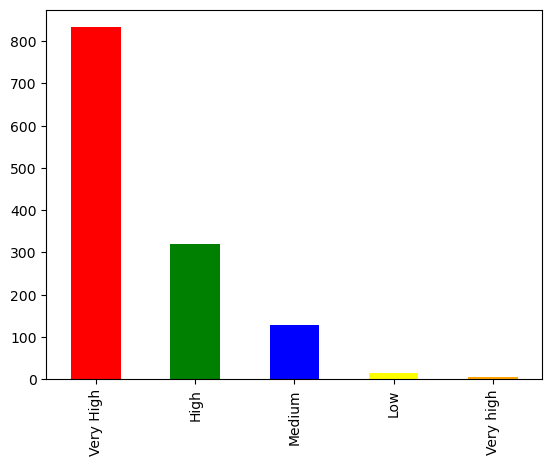

In [6]:
# Our key metric is research output, so let's look at the counts of each research output type
# We can use the value_counts() method to do this

df['research_output'].value_counts()

# Now lets make a barplot of the counts of each research output type

df['research_output'].value_counts().plot(kind='bar')

# And can we add colour depending on the count of each research output type?

df['research_output'].value_counts().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'orange'])


As we can see, most of the univerities considered by the QS World University rankings have very high research outputs. The next obvious question is to investigate to which extent research output correlates with the size of the university.

In [7]:
# Let's see whether there is a relationship between the faculty count and the research output

# First we need to remove all "," from the faculty count column and convert it to a numeric type
df['faculty_count'] = pd.to_numeric(df['faculty_count'].str.replace(',', ''), errors='coerce')

# Second we need to change "Very high" and "Very High" to be the same in research_output
df['research_output'] = df['research_output'].str.replace('Very high', 'Very High')


Text(0.5, 1.0, 'Faculty Count by Research Output')

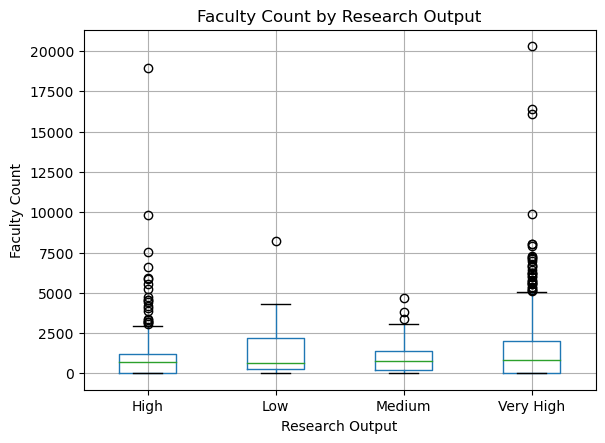

In [26]:
# And now we do a boxplot.
df.boxplot(column='faculty_count', by='research_output')

# Change the title of the x-axis
plt.xlabel('Research Output')

# Change the title of the y-axis
plt.ylabel('Faculty Count')

# Remove the title of the boxplot
plt.suptitle('')

# Change the title of the plot
plt.title('Faculty Count by Research Output')

Text(0, 0.5, 'Count')

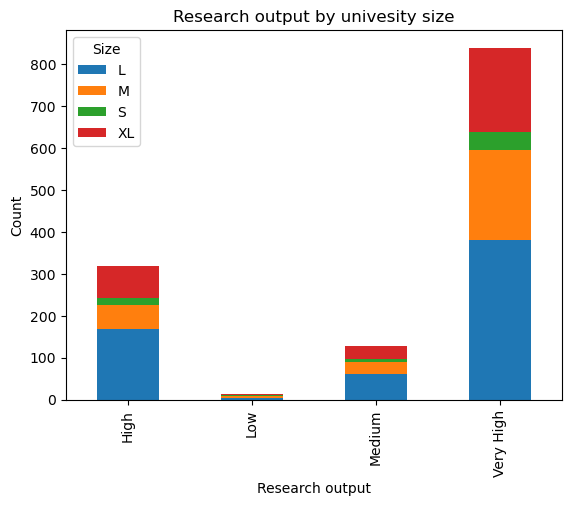

In [20]:
# Now let's visualize the relationship between the size of the university and the research output

# And can we group this by research output?
df.groupby(['research_output', 'size']).size().unstack().plot(kind='bar', stacked=True)

# Add a title to the plot
plt.title('Research output by univesity size')

# Change the title of the legend
plt.legend(title='Size')

# Change the x-axis label
plt.xlabel('Research output')

# Change the y-axis label
plt.ylabel('Count')


Just via visual inspectation, it seems that the ratios are farily consistent accross the universities.

Text(0, 0.5, 'Count')

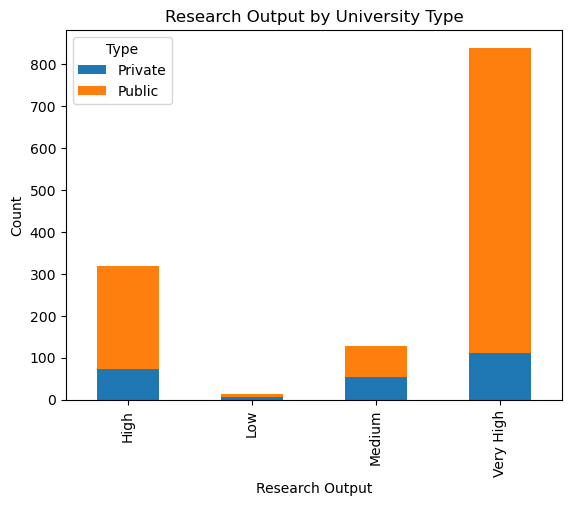

In [19]:
# Let's do the same thing, but now we use university type (public or private) instead of its size.

# Make a barplot of count of university type grouped by research output
df.groupby(['research_output', 'type']).size().unstack().plot(kind='bar', stacked=True)

# Change the title of the x axis
plt.xlabel('Research Output')

# Change the title of the legend
plt.legend(['Private', 'Public'], title = 'Type')

# Add a title to the plot
plt.title('Research Output by University Type')

# Change the title of the y axis
plt.ylabel('Count')